In [1]:
# importing 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 

In [3]:
# data needed from sleuth to compare 

# s2c to collapse tpm into averages
s2c = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/s2c.csv", index_col = 0)

# t2g to compare gene-level analysis
t2g = pd.read_csv("/project/fudenber_735/genomes/mm9/ensembl/ensembl_relational_downloads/biomaRt_mm9_t2g.csv", index_col = 0)

In [4]:
# tpm values from sleuth matrix
sleuth_matrix = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/sleuth_matrix.csv")

In [5]:
sleuth_matrix = sleuth_matrix.rename(columns = {'Unnamed: 0' : "target_id"}) 
sleuth_matrix.head(4)

,target_id,SRR5517500,SRR5517501,SRR5517502,SRR5517503,SRR5517504,SRR5517505,SRR5517506,SRR5517507,SRR5517508,...,SRR5517514,SRR5517515,SRR5517516,SRR5517517,SRR5517518,SRR5517519,SRR5517520,SRR5517521,SRR5517522,SRR5517523
0,ENSMUST00000000001,39.526672,32.475073,35.733834,43.632436,38.998357,45.479582,46.949717,45.727178,37.967990,...,51.978648,53.475671,54.755076,57.286379,45.659645,19.492515,48.568292,54.081777,56.250874,61.982748
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUST00000000010,0.685869,1.016973,1.113045,2.929267,0.829355,0.723069,0.676170,0.678165,2.251083,...,0.883225,0.539575,0.704452,0.494842,0.950310,0.786166,0.941070,0.509465,0.559375,0.681799
3,ENSMUST00000000028,21.409744,24.086444,21.876858,15.070121,22.138165,24.281706,18.849206,21.084065,17.920251,...,29.161810,25.840052,32.558737,26.556631,16.778541,6.153680,16.397125,24.813609,22.445236,20.272369


In [6]:
lst = s2c['condition'].unique()
smps = list(s2c[s2c['condition'] == lst[0]]['sample'])
print(smps)

['SRR5517500', 'SRR5517505', 'SRR5517510']


In [7]:
average_tpm = sleuth_matrix[['target_id']]

In [8]:
lst = s2c['condition'].unique()

for condition in lst:
    
    samples = list(s2c[s2c['condition'] == lst[0]]['sample'])
    
    
    # df.loc[df['channel'].isin(['sale','fullprice'])]
    
#     df.iloc[:, columns]
    
    average_tpm[condition+'_mean_TPM'] = sleuth_matrix.loc[:, samples].mean(axis=1)

/tmp/SLURM_3708424/ipykernel_16640/465387413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_tpm[condition+'_mean_TPM'] = sleuth_matrix.loc[:, samples].mean(axis=1)


In [9]:
average_tpm.head(3)

,target_id,RNA-seq_CTCF-AID_untreated_mean_TPM,RNA-seq_CTCF-AID_auxin1day_mean_TPM,RNA-seq_CTCF-AID_auxin2days_mean_TPM,RNA-seq_CTCF-AID_auxin4days_mean_TPM,RNA-seq_CTCF-AID_washoff2days_mean_TPM,RNA-seq_WT-untagged_untreated_mean_TPM,RNA-seq_WT-untagged_auxin2days_mean_TPM,RNA-seq_WT-untagged_auxin4days_mean_TPM
0,ENSMUST00000000001,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUST00000000010,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324


In [10]:
t2g = t2g.rename(columns = {'ensembl_transcript_id' : 'target_id', 'ensemble_gene_id' : 'ens_gene', 'mgi_symbol' : 'ext_gene'})

In [11]:
t2g.head(3)

,target_id,ensembl_gene_id,ext_gene
1,ENSMUST00000115962,ENSMUSG00000079832,NaN
2,ENSMUST00000099422,ENSMUSG00000074844,NaN
3,ENSMUST00000115951,ENSMUSG00000079818,NaN


In [12]:
# Collapse sleuth_matrix into average tpms per condition, and include ext_gene name
average_tpm = average_tpm.merge(t2g, on='target_id', how='left')

In [13]:
average_tpm.head(3)

,target_id,RNA-seq_CTCF-AID_untreated_mean_TPM,RNA-seq_CTCF-AID_auxin1day_mean_TPM,RNA-seq_CTCF-AID_auxin2days_mean_TPM,RNA-seq_CTCF-AID_auxin4days_mean_TPM,RNA-seq_CTCF-AID_washoff2days_mean_TPM,RNA-seq_WT-untagged_untreated_mean_TPM,RNA-seq_WT-untagged_auxin2days_mean_TPM,RNA-seq_WT-untagged_auxin4days_mean_TPM,ensembl_gene_id,ext_gene
0,ENSMUST00000000001,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,ENSMUSG00000000001,Gnai3
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ENSMUSG00000000003,Pbsn
2,ENSMUST00000000010,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,ENSMUSG00000020875,Hoxb9


In [14]:
average_tpm['ext_gene']

0         Gnai3
1          Pbsn
2         Hoxb9
3        Cdc45l
4          Igf2
          ...  
89360       NaN
89361       NaN
89362       NaN
89363       NaN
89364       NaN
Name: ext_gene, Length: 89365, dtype: object

In [15]:
fpkm = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/supplement-10_RNA_seq_FPKM.csv", index_col = 0)

In [16]:
fpkm

,tracking_id,locus,CTCF-AID_untreated_mean_FPKM,CTCF-AID_1day_mean_FPKM,CTCF-AID_2days_mean_FPKM,CTCF-AID_4days_mean_FPKM,CTCF-AID_washoff_mean_FPKM,1day.1,2days.1,4days.1,2days_washoff_2days.1,WT_untreated_mean_FPKM,WT_2days_mean_FPKM,WT_4days_mean_FPKM
0,0610005C13Rik,chr7:52823164-52845080,0.784511,0.804255,1.040841,2.176798,1.209881,no,no,no,no,0.531110,0.539697,0.414068
1,0610007P14Rik,chr12:87156404-87165495,71.716133,74.856200,63.412767,59.250033,67.995733,no,no,no,no,57.020867,49.716167,57.023633
2,0610009B22Rik,chr11:51498886-51502136,69.529333,76.436433,61.336067,38.937500,58.353700,no,no,yes,no,58.497000,46.990267,58.072767
3,0610009L18Rik,chr11:120209991-120212504,0.944842,1.154941,0.905838,1.097459,0.889548,no,no,no,no,1.180704,1.977405,0.825640
4,0610009O20Rik,chr18:38398058-38422283,17.565900,20.652933,20.476800,20.633733,18.857300,no,no,no,no,18.864133,18.413433,18.779333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24310,Zyx,chr6:42299826-42330557,8.531693,8.734813,11.727350,24.111000,11.359220,no,no,yes,no,13.565800,17.260200,15.288367
24311,Zzef1,chr11:72609727-72740622,2.597283,2.411157,2.507930,3.121180,2.856007,no,no,no,no,2.718923,1.981210,2.533253
24312,Zzz3,chr3:152058966-152344396,9.986867,8.012557,7.069317,8.471867,10.256167,no,no,no,no,8.890843,7.591897,8.981187
24313,a,chr2:154839305-154876748,0.087051,0.167859,0.370351,0.402713,0.090154,no,no,no,no,0.066810,0.176484,0.272123


In [17]:
# Just looking at the sets of tracking_ids vs ext_genes shared between the two:
print(len(average_tpm['ext_gene'].unique()))
print(len(fpkm['tracking_id'].unique()))

print(len(set(average_tpm['ext_gene'].unique()) - set(fpkm['tracking_id'].unique())))
print(len(set(fpkm['tracking_id'].unique()) - set(average_tpm['ext_gene'].unique())))

20306
24315
3221
7230


Looks like there's about 3000 genes that are in 

[' RNA-seq_CTCF-AID_untreated' ' RNA-seq_CTCF-AID_auxin1day'
 ' RNA-seq_CTCF-AID_auxin2days' ' RNA-seq_CTCF-AID_auxin4days'
 ' RNA-seq_CTCF-AID_washoff2days' ' RNA-seq_WT-untagged_untreated'
 ' RNA-seq_WT-untagged_auxin2days' ' RNA-seq_WT-untagged_auxin4days']
(30308, 4)


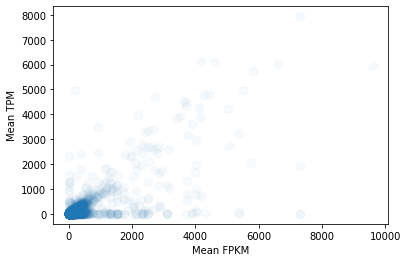

In [18]:
print(lst)
condition = lst[1]
tpmColName = condition+"_mean_TPM"
noAuxin = condition.split('auxin')
fpkmColName =''.join(noAuxin).split(' RNA-seq_')[1]+"_mean_FPKM"

                
#merged = fpkm['tracking_id', fpkmColName].merge(average_tpm['ext_gene', tpmColName], how='inner')
justThisCondition = fpkm[['tracking_id',fpkmColName]].merge(average_tpm[['ext_gene', tpmColName]], how = 'inner', left_on='tracking_id', right_on='ext_gene')
print(justThisCondition.shape)

plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)

(0.0, 500.0)

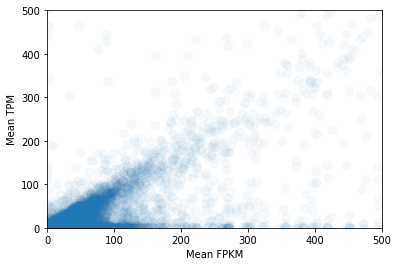

In [19]:
plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)
plt.xlim(0, 500)
plt.ylim(0, 500)

(0.0, 100.0)

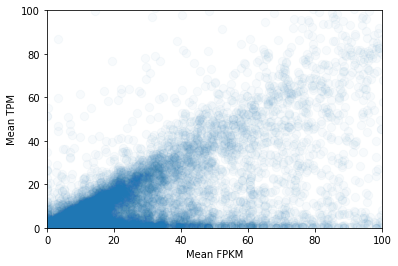

In [20]:
plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)
plt.xlim(0, 100)
plt.ylim(0, 100)

Looks like a lot of datapoints that have fairly high FPKM have zero TPM. 

In [21]:

# generating comparison dot plots for fpkm vs tpm counts
def(condition):
    
    tpmColName = condition+"_mean_TPM"
    noAuxin = condition.split('auxin')
    fpkmColName = ''.join(joAuxin)+"_mean_FPKM"
    
    
    

SyntaxError: invalid syntax (3559806553.py, line 2)

# Next Steps for rest of week:

* maybe compare list of sig genes (for one condition)

--> 2day vs untreated (sig vs not sig DE) : make 2x2 grid comparison of these sets of conditions

* DEG vs CHIP CTCF (Fig. 6 or something)
--> missing fold-change from kallisto genes -- need to recreate (from kallisto data)
    --> 
--> can also do DET vs CHiP